In [100]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt
import os

## Grundperiode, Grundfrequenz, Signaldauer, Abtastfrequenz, Signallänge, Abtastintervall
## Signal graphisch dargestellt

Grundperiode: 1.8ms
Grundfrequenz: 555.5555555555555hz
Signaldauer: 0.05001499873s
Singallänge: 10004
Abtastfrequenz: 200020.0Hz
Abtastintervall: 4.999999873038088e-06s


(-0.00999968, 4.99000019)

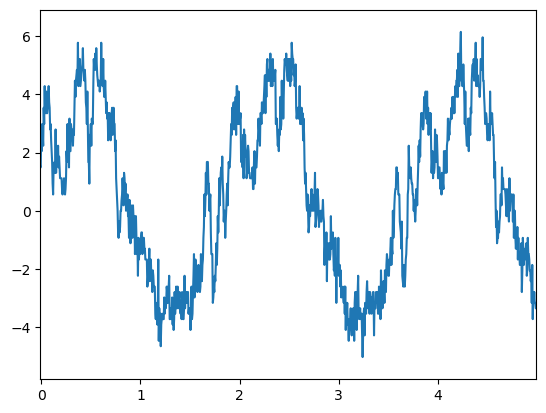

In [101]:
abtast, messdaten = np.genfromtxt(os.getcwd() + "/Messdaten/mundharmonika.csv", delimiter=";", skip_header=3, usecols=(0,1)).T

signaldauer = (np.abs(abtast[0]) + np.abs(abtast[-1])) / 1000
signalLen = len(abtast)
abtastFreq = signalLen * (1 / signaldauer)
abtastIntervall_list = []
for i in range(signalLen-1):
    abtastIntervall_list.append((abtast[i+1] - abtast[i]) / 1000)
abtastIntervall = np.mean(abtastIntervall_list)
grundperiode = 1.8 # Abgelesen?
grundFreq = 1/(grundperiode/1000)
print(f"Grundperiode: {grundperiode}ms")
print(f"Grundfrequenz: {grundFreq}hz")
print(f"Signaldauer: {signaldauer}s")
print(f"Singallänge: {signalLen}")
print(f"Abtastfrequenz: {np.round(abtastFreq)}Hz")
print(f"Abtastintervall: {abtastIntervall}s")

plt.plot(abtast, messdaten)
plt.xlim(abtast[5000], abtast[6000])

# Fouriertransformierte des Signals
## max Amplitude, Grundfrequenz

Amplitude: 16993.796184299783
Grundfrequenz: 199480.21298211112hz


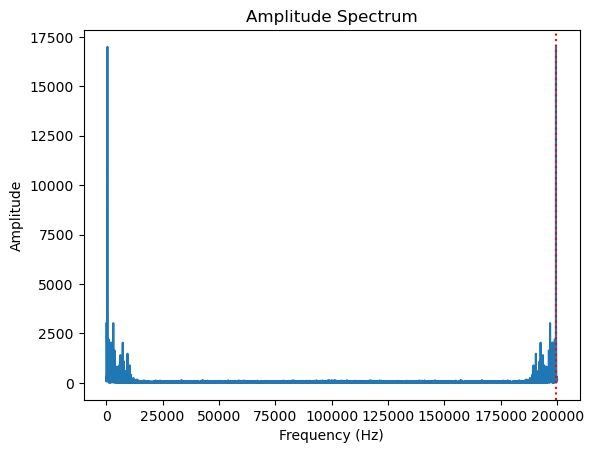

In [102]:
fourier_transform = np.fft.fft(messdaten)
amplituden = np.abs(fourier_transform)
frequenzen = [i / (signalLen * abtastIntervall) for i in range(signalLen)]
grundFreq = frequenzen[np.argmax(amplituden)]
print(f"Amplitude: {np.max(amplituden)}")
print(f"Grundfrequenz: {grundFreq}hz")
plt.plot(frequenzen, amplituden)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.axvline(grundFreq, color='r', linestyle=':', label='Fundamental Frequency')


# Amplituden und Phasengang

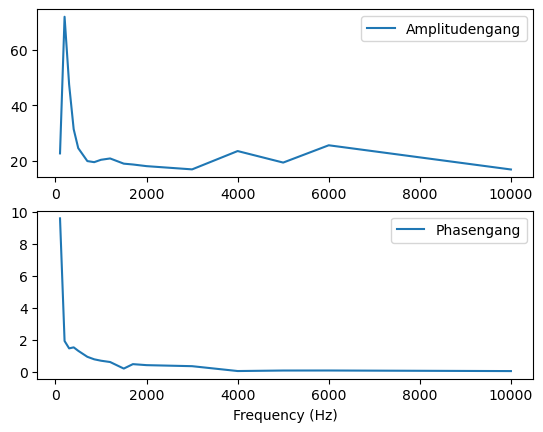

In [103]:
frequenzen, ptpA, ptpB, phasenver = np.genfromtxt(os.getcwd() + "/Messdaten/lautsprecher_groß.csv", delimiter=",", skip_header=1).T

plt.subplot(2,1,1)
plt.plot(frequenzen, ptpB, label="Amplitudengang")
plt.legend()
plt.subplot(2,1,2)
plt.plot(frequenzen, phasenver, label="Phasengang")
plt.xlabel('Frequency (Hz)')
plt.legend()

# Bode-Diagramm

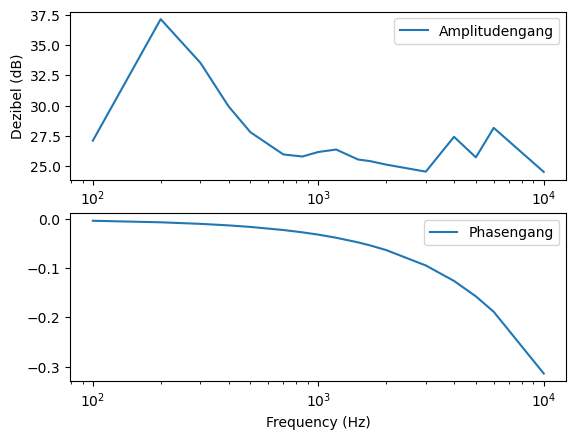

In [105]:
dezibel = [20 * np.log10(x) for x in ptpB]
phasenwinkel = [-abtastIntervall_list[i] * f * np.deg2rad(360) for i,f in enumerate(frequenzen)]

plt.subplot(2,1,1)
plt.semilogx(frequenzen, dezibel, label="Amplitudengang")
plt.ylabel('Dezibel (dB)')
plt.legend()
plt.subplot(2,1,2)
plt.semilogx(frequenzen, phasenwinkel, label="Phasengang")
plt.xlabel('Frequency (Hz)')
plt.legend()